# Introduction

Ceci est un notebook permettant de visualiser le nombre d'observations par année et par département. On se demande notamment suite aux exemples de la Nièvre et de l'Ile-et-Vilaine s'il n'y a pas plus significativement plus d'observations dans certaines régions, ce qui motiverait le fait d'avoir une approche plus locale (régionale/départementale) plutôt que d'avoir une vision globale et métropolitaine du problème.

# Import dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./spipoll.csv")

C:\Users\guilts0300\AppData\Local\Temp\ipykernel_12712\35506862.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./spipoll.csv")


In [4]:
# Séparation de la colonne 'coordonnées' en deux colonnes 'longitude' et 'latitude'
df[['longitude', 'latitude']] = df['coordonnees_GPS'].str.split(',', expand=True).astype(float)

# Conversion en datetime
df['collection_date'] = pd.to_datetime(df['collection_date'])

# Extraction de l'année à partir de la colonne 'date_observation'
df['annee_collection'] = df['collection_date'].dt.year

# Conversion les codes postaux en chaînes de caractères (str)
df['code_postal'] = df['code_postal'].astype(str)

# Utilisation d'une expression régulière pour extraire les deux premiers chiffres (numéro de département)
df['departement'] = df['code_postal'].str.extract(r'^(\d{2})')

In [6]:
to_drop = ['collection_nom', 'protocole_long',
       'plante_famille', 'plante_genre', 'plante_espece', 'plante_sc',
       'plante_fr', 'plante_precision', 'plante_inconnue', 'plante_caractere',
       'photo_fleur', 'photo_plante', 'photo_feuille', 'coordonnees_GPS',
       'code_postal', 'habitat', 'grande_culture', 
       'collection_heure_debut', 'nebulosite', 'temperature', 'vent',
       'fleur_ombre', 'insecte_ordre', 'insecte_super_famille',
       'insecte_famille', 'insecte_sous_famille', 'insecte_genre',
       'insecte_espece', 'insecte_sc', 'insecte_fr',
       'insecte_denominationPlusPrecise', 'insecte_CdNomtaxref',
       'insecte_abondance', 'insecte_commentaire', 'insecte_vu_sur_fleur',
       'nb_validation', 'nb_suggestion']

In [7]:
df.drop(columns = to_drop, inplace = True)

In [8]:
df.columns

Index(['collection_id', 'user_id', 'collection_date', 'longitude', 'latitude',
       'annee_collection', 'departement'],
      dtype='object')

# Visualisation

In [10]:
df['departement'].value_counts()

35    92017
70    54163
74    38108
78    30753
12    28891
      ...  
97       17
04       17
02        6
96        3
09        2
Name: departement, Length: 95, dtype: int64

In [12]:
df=df.where(df['annee_collection'] > 2010).dropna(subset='annee_collection')

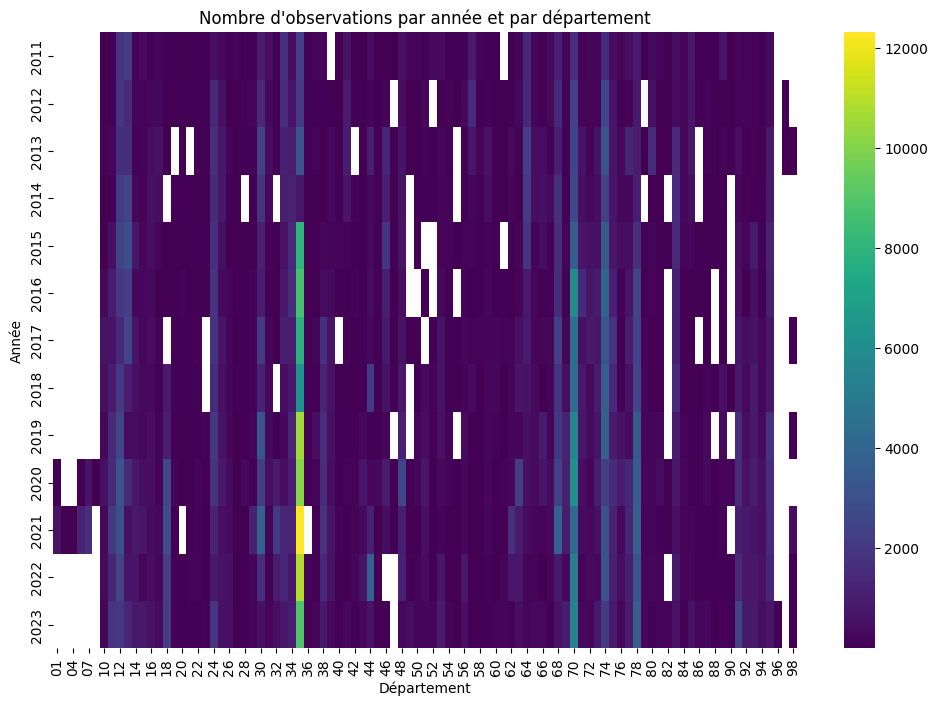

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conversion de l'index en entiers
df['annee_collection'] = df['annee_collection'].astype(int)

# Utilisation de la fonction pivot_table pour créer une table croisée du nombre d'observations par année et par département
table_croisee = df.pivot_table(index='annee_collection', columns='departement', aggfunc='size')

# Tracé de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(table_croisee, cmap='viridis', annot=False, fmt='.2f')  # fmt='.2f' pour les nombres flottants
plt.title('Nombre d\'observations par année et par département')
plt.xlabel('Département')
plt.ylabel('Année')
plt.show()


On observe facilement que les département du 35, du 70, du 74 et du 78, l'Ile-et-Vilaine, la Haute-Saône, la Haute Savoie et les Yvelines sont ceux qui semblent souvent avoir le plus d'observations par année. Or, ce sont les départements où l'on retrouve les clusters qui persistent dans le temps pour une valeur de min_samples inchangée au cours des années et égales à 500.

On avait également un cluster à la jonction de la Drôme et de l'Ardèche (départements 26 et 7).

Pour de futures analyses, on préconise donc d'indexer min_samples sur le nombre d'observations locales pour affiner l'étude de l'évolution des clusters ou d'avoir une approche plus localisée du problème au lieu de le considérer de manière globale et générale, ce qui pourrait en fait masquer certaines hypothèses/conclusions intéressantes.
